##### T1-1 이상치(IQR)

- 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
- titanic/train.csv

In [19]:
import pandas as pd
import numpy as np

titanic_train = pd.read_csv('../data/titanic/train.csv')
titanic_train.head()

dir(pd)
dir(np)

lower_quantile = titanic_train['Fare'].quantile(0.25) # Q1
upper_quantile = titanic_train['Fare'].quantile(0.75) # Q3
iqr = upper_quantile - lower_quantile
iqr

lower_bound = lower_quantile - (1.5 * iqr) 
upper_bound = upper_quantile + (1.5 * iqr)

outlier = titanic_train.loc[(titanic_train['Fare'] < lower_bound)|(titanic_train['Fare'] > upper_bound)]['Sex']
outlier.head()

print(outlier[outlier == 'female'].count())


70


In [33]:
# 1-1 sol)

import pandas as pd
import numpy as np
df = pd.read_csv('../data/titanic/train.csv')

# print(df.isnull().sum())
# df.head()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

fare_outlier = df.loc[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print((f"({lower_bound}, {upper_bound})"))
print(sum(fare_outlier['Sex'] == 'female'))


(-26.724, 65.6344)
70


##### T1-2 이상치(소수점 나이)

- 주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오
- basic.csv

In [44]:
dir(np)

['False_',
 'ScalarType',
 'True_',
 '_CopyMode',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__array_api_version__',
 '__array_namespace_info__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__expired_attributes__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__numpy_submodules__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_array_api_info',
 '_core',
 '_distributor_init',
 '_expired_attrs_2_0',
 '_globals',
 '_int_extended_msg',
 '_mat',
 '_msg',
 '_pyinstaller_hooks_dir',
 '_pytesttester',
 '_specific_msg',
 '_type_info',
 '_typing',
 '_utils',
 'abs',
 'absolute',
 'acos',
 'acosh',
 'add',
 'all',
 'allclose',
 'amax',
 'amin',
 'angle',
 'any',
 'append',
 'apply_along_axis',
 'apply_over_axes',
 'arange',
 'arccos',
 'arccosh',
 'arcsin',
 'arcsinh',
 'arctan',
 'arctan2',
 'arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'around',
 'array',
 'arr

In [57]:
import pandas as pd
import numpy as np

basic = pd.read_csv('../data/basic1.csv')
basic

# 나이 소수점있는 데이터 찾기
outlier = basic[(basic['age'] - np.floor(basic['age'])) != 0]
outlier.head()

outlier['올림'] = np.ceil(outlier['age'])
outlier.head()

outlier['내림'] = np.floor(outlier['age'])
outlier.head()

outlier['절사'] = np.trunc(outlier['age'])
outlier.head()

mean_1 = outlier['올림'].mean()
mean_2 = outlier['내림'].mean() # -5.5 내림 > -6
mean_3 = outlier['절사'].mean() # -5.5 절사 > -5

print(mean_1 + mean_2 + mean_3)

69.5


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_6340\3823649341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['올림'] = np.ceil(outlier['age'])
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_6340\3823649341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['내림'] = np.floor(outlier['age'])
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_6340\3823649341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [56]:
# 1-2 sol)

import pandas as pd
import numpy as np

df = pd.read_csv('../data/basic1.csv')
df.head()

# 나이가 소숫점인 데이터
df = df[(df['age'] - np.floor(df['age'])) != 0]
df

m_ceil = np.ceil(df['age']).mean()
m_floor = np.floor(df['age']).mean()
m_trunc = np.trunc(df['age']).mean()

m_ceil, m_floor, m_trunc

print(m_ceil + m_floor + m_trunc)

69.5


##### T1-3 결측치 처리

- 주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!
- basic1.csv

In [65]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f4      100 non-null    object 
 6   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


In [69]:
# dir(basic)
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.frame:

groupby(self, by=None, axis: 'Axis | lib.NoDefault' = <no_default>, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'DataFrameGroupBy'
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        alig

In [74]:
# import sklearn
# dir(sklearn.preprocessing)

In [ ]:
basic.head()
# dir(np)
basic.isnull().sum() >= len(basic) * 0.8
basic.drop('f3', axis= 1, inplace= True)

In [137]:
# dir(np.float64)
# help(np.float64)

In [ ]:
basic.isnull().sum() # f1 : 31


city_f1_median = basic[['city', 'f1']].groupby(by = 'city').median()
print(city_f1_median)
# city_f1_median.index
# city_f1_median.loc['서울']['f1']

missing_data = basic[basic['f1'].isnull()]
missing_data.head()

for i in missing_data.index :
  city = basic.loc[i, 'city']
  basic.loc[i, 'f1'] = city_f1_median.loc[city]['f1']

# 잘 들어갔는지 확인
missing_data = basic[basic['f1'].isnull()]
missing_data.head()

print(basic['f1'].mean())

# 솔루션대로
# basic['f1'] = basic['f1'].fillna(df['city'].map({'서울' : city_f1_median['서울']['f1']})) # inplace


        f1
city      
경기    58.0
대구    75.0
부산    62.0
서울    68.0
65.52


In [111]:
# 1-3. sol)
# pandas, numpy

df = pd.read_csv('../data/basic1.csv')
df.head()

df.isnull().sum()
df.shape

df.isnull().sum() / df.shape[0]

# f3 컬럼 삭제
print('삭제 전 : ', df.shape)
df = df.drop(['f3'], axis= 1)
print('삭제 후 : ', df.shape)

df['city'].unique()

seoul_median = df[df['city'] == '서울']['f1'].median()
kyeonggi_median = df[df['city'] == '경기']['f1'].median()
busan_median = df[df['city'] == '부산']['f1'].median()
daegu_median = df[df['city'] == '대구']['f1'].median()

# 방법 2
# k, d, b, s = df.groupby('city')['f1'].median()
seoul_median, kyeonggi_median, busan_median, daegu_median

df['f1'] = df['f1'].fillna(df['city'].map({'서울' : seoul_median,
                                            '경기' : kyeonggi_median,
                                            '부산' : busan_median,
                                            '대구' : daegu_median}))

df['f1'].mean()

삭제 전 :  (100, 8)
삭제 후 :  (100, 7)


np.float64(65.52)

##### T1-4 왜도/첨도(로그스케일)

- 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
- houseprices / train.csv

In [126]:
# dir(np)
import sklearn
# dir(sklearn)
# import statistics
# dir(statistics)
import math
# dir(math) # log1p
# dir(pd.Series)
# dir(sklearn.preprocessing)


In [131]:
# Series : skew, kurt # kurtosis?
df = pd.read_csv('../data/houseprices/train.csv')
df.head()

saleprice_skew = df['SalePrice'].skew()
saleprice_kurt = df['SalePrice'].kurt()

df['log_SalePrice'] = df['SalePrice'].apply(math.log1p)
log_saleprice_skew = df['log_SalePrice'].skew()
log_saleprice_kurt = df['log_SalePrice'].kurt()

total = saleprice_skew + saleprice_kurt + log_saleprice_skew + log_saleprice_kurt
total_2f = round(total, 2)
print(total_2f)

9.35


In [136]:
# 1-4. Sol)
# df['SalePrice'].hist()

s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()

df['SalePrice_log'] = np.log1p(df['SalePrice'])
# df['SalePrice_log'].hist()

s2 = df['SalePrice_log'].skew()
k2 = df['SalePrice_log'].kurt()

print(round(s1+s2+k1+k2,2))


9.35


##### T1-5 표준편차

- 주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오
- basic1.csv

In [ ]:
df = pd.read_csv('../data/basic1.csv')
df.head()

df.isnull().sum()

enfj_std = df[df['f4'] == 'ENFJ']['f1'].std()
infp_std = df[df['f4'] == 'INFP']['f1'].std()

print(abs(enfj_std - infp_std))

# sol와 동일

5.859621525876811


##### T1-6 Groupby 합계

- 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
- basic1.csv


In [156]:
df = pd.read_csv('../data/basic1.csv')
df.isnull().sum()

drop_df = df[~df['f1'].isnull()]
drop_df.isnull().sum()

grouped_df = drop_df.groupby(['city', 'f2'])['f1'].sum()
print(grouped_df['경기'][0])

833.0


In [162]:
# 1-6 sol)
df = pd.read_csv('../data/basic1.csv')
df = df.dropna(subset = ['f1'])

df2 = df.groupby(['city', 'f2'])[['age', 'f1', 'f5']].sum()
df2

print(df2.iloc[0]['f1'])

833.0


##### T1-7 값 변경

- 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!
- basic1.csv

In [19]:
# dir(df['f4'])
# help(pd.DataFrame.replace)

In [22]:
import pandas as pd

df = pd.read_csv('../data/basic1.csv')
df.head(10)

df['f4'].replace(to_replace= {'ESFJ' : 'ISFJ'}, inplace= True)
# df.head(10)

print(int(df[(df['city'] == '경기')&(df['f4'] == 'ISFJ')]['age'].max()))

# 90

90


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_14564\558857038.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['f4'].replace(to_replace= {'ESFJ' : 'ISFJ'}, inplace= True)


In [26]:
# T1-7 SOL)
df = pd.read_csv('../data/basic1.csv')
df[df['f4'] == 'ESFJ']
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

df[df['f4'] == 'ESFJ']
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]['age'].max()

np.float64(90.0)

##### T1-8 누적합/보간

- 주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)
- basic1.csv

In [36]:
# dir(pd.Series) # cumsum
# help(pd.Series.cumsum) # self, axis, skipna
# dir(pd.Series) # bfill, backfill
# help(pd.Series.bfill) # self, axis, inplace, limit

In [ ]:
df = pd.read_csv('../data/basic1.csv')
df.head()

df_f2 = df[df['f2'] == 1]
df_f2.head()

# df_f2.isnull().sum() # f1 : 11
df_f2['f1'] = df_f2['f1'].bfill()
df_f2.isnull().sum()

df_f2['f1'] = df_f2['f1'].cumsum()
print(df_f2['f1'].mean()) 

1315.2702702702702


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_14564\994003479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2['f1'] = df_f2['f1'].bfill()
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_14564\994003479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2['f1'] = df_f2['f1'].cumsum()


In [47]:
# T1-8 sol)

# s.fillna(method='bfill') # 바로 뒤값으로 채워넣는 방법
# s.fillna(method='pad') # 이전값으로 채워넣는 방법
df = pd.read_csv('../data/basic1.csv')
df2 = df[df['f2']==1]['f1'].cumsum()
df2.head(10)

# df2 = df2.fillna(method= 'bfill')
df2 = df2.bfill()
df2.head(10)

print(df2.mean())

980.3783783783783


##### T1-9 표준화(중앙값)

- 주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오¶
- 데이터셋 : basic1.csv

In [54]:
import numpy as np

df = pd.read_csv('../data/basic1.csv')

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

f5_arr = np.array(df['f5']).reshape(-1, 1)

df['f5'] = std_scaler.fit_transform(f5_arr)
print(df['f5'].median())


0.260619629559015


In [55]:
# T1-9 Sol)

# 참고)
# scaler = StandardScaler()
# print(scaler.fit(data))
# print(scaler.transform(data))

df = pd.read_csv('../data/basic1.csv')

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['f5'] = std_scaler.fit_transform(df[['f5']])
print(df['f5'].median())

0.260619629559015


##### T1-10 Yeo-Johnson & Box-Cox

- 주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오¶
- 데이터셋 : basic1.csv

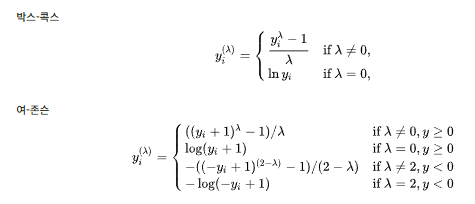

In [25]:
# help(pd.Series.fillna) # self, value, method
# dir(pd.Series) # transform
# help(pd.Series.transform)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/basic1.csv')
df.head()

df_over20 = df[df['age'] >= 20]
df_over20.head()

df_over20.isnull().sum() # f1 : 26

df_over20_mode = df_over20['f1'].mode()
df_over20_mode # 50.0
print(df_over20_mode[0])

df_over20['f1'] = df_over20['f1'].fillna(df_over20_mode[0])
df_over20.isnull().sum()


# 여-존슨/박스콕스 변환값 --------------------------------


50.0


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_27252\2998831940.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_over20['f1'] = df_over20['f1'].fillna(df_over20_mode[0])


id       0
age      0
city     0
f1       0
f2       0
f3      78
f4       0
f5       0
dtype: int64

In [62]:
# hint) from sklearn.preprocessing import power_transform

# 문제 remind ) 
# 주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, 
# f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 
# 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오¶

import sklearn
# help(sklearn.preprocessing.power_transform) # X, method= 'yeo-johnson'(default) / 'box-cox
from sklearn.preprocessing import power_transform

df = pd.read_csv('../data/basic1.csv')
df.head()

df_over20 = df[df['age'] >= 20]
df_over20.head()

df_over20.isnull().sum() # f1 : 26

df_over20_mode = df_over20['f1'].mode()
df_over20_mode # 50.0
print(df_over20_mode[0])

df_over20['f1'] = df_over20['f1'].fillna(df_over20_mode[0])
df_over20.isnull().sum()

value_arr = np.array(df_over20['f1']).reshape(-1, 1)
df_over20['yeo-johnson'] = power_transform(value_arr)
df_over20['box-cox'] = power_transform(value_arr, method= 'box-cox')

df_over20['abs_difference'] = abs(df_over20['yeo-johnson'] - df_over20['box-cox'])
print(round(df_over20['abs_difference'].sum(), 2)) # 0.051

# np.ceil은 int로 반올림


50.0
0.05


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_27252\728866718.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_over20['f1'] = df_over20['f1'].fillna(df_over20_mode[0])
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_27252\728866718.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_over20['yeo-johnson'] = power_transform(value_arr)
C:\Users\LGCARE\AppData\Local\Temp\ipykernel_27252\728866718.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [61]:
# T1-10 Sol)
from sklearn.preprocessing import power_transform

df = pd.read_csv('../data/basic1.csv')
# print('조건 적용 전 : ', df.shape)
df = df[df['age'] >= 20]
# print('조건 적용 후 : ', df.shape) # 100 > 83

# print('결측치 처리 전 : \n', df.isnull().sum())
print('최빈값 : ', df['f1'].mode()[0])
df['f1'] = df['f1'].fillna(df['f1'].mode()[0])
# print('결측치 처리 후 : \n', df.isnull().sum())

df['y'] = power_transform(df[['f1']])
df['y'].head()

# df['y'] = power_transform(df[['f1']], standardize= False)
# df['y'].head()

df['b'] = power_transform(df[['f1']], method= 'box-cox')
df['b'].head()

# df['b'] = power_transform(df[['f1']], method= 'box-cox', standardize= False)
# df['b'].head()

# standardize=False는 python과 R의 디폴트가 달라 결과를 맞추기 위함이었어요! 
# 이번 문제는 출제 가능성이 낮아 보여요 (이미 풀이한 분들이 있어 그대로 두었습니다.)

# # 박스콕스 방법2
# from scipy import stats
# x = stats.boxcox(df['f1'])
# x

round(sum(np.abs(df['y'] - df['b'])), 2) # 39.2

최빈값 :  50.0


0.05

##### T1-11 min-max scaling

- min-max스케일링 기준 상하위 5% 구하기
- 주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오
- 데이터셋 : basic1.csv

In [ ]:
df = pd.read_csv('../data/basic1.csv')
df.isnull().sum() # f5 결측치 x

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['f5'].head() 
df['f5'] = scaler.fit_transform(df[['f5']])
df['f5'].head()

print(np.quantile(df['f5'], 0.05) + np.quantile(df['f5'], 0.95)) 


1.0248740983597389


In [67]:
# T1-11 Sol)

df = pd.read_csv('../data/basic1.csv')

# # EDA
# print(df.head())
# print(df.isnull().sum()) 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['f5_1'] = scaler.fit_transform(df[['f5']])
# print(df.head())

lower = df['f5_1'].quantile(0.05)
print(lower)

upper = df['f5_1'].quantile(0.95)
print(upper)

print(lower + upper)

0.03670782406038746
0.9881662742993513
1.0248740983597389


##### T1-12 상하위 10개 추출

- 주어진 데이터에서 상위 10개 국가의 접종률 평균과 하위 10개 국가의 접종률 평균을 구하고, 그 차이를 구해보세요            
(단, 100%가 넘는 접종률 제거, 소수 첫째자리까지 출력)

- 데이터셋 : covid-vaccination-vs-death_ratio.csv

In [71]:
# help(pd.read_csv)

In [ ]:
# date : date that this data belong
# total_vaccinations : number of all doses of COVID vaccine usage in that country
# people_vaccinated : number of people who got at least one shot of COVID vaccine
# people_fully_vaccinated : number of people who got full vaccine shots
# New_deaths : number of daily new deaths
# population : 2021 country population
# ratio : % of vaccinations in that country at that date = people_vaccinated/population * 100
import pandas as pd

df = pd.read_csv('../data/covid-vaccination-vs-death_ratio.csv', index_col= 0)
df.head()

df = df[df['ratio'] <= 100]
df.head()

df = df.sort_values(by = 'ratio', ascending= True)
df['ratio'].head(10)
df.head()

lowest_country10 = []
for i in range(len(df['country'])) :
  lowest_country10.append(df['country'].iloc[i])
  lowest_country10 = list(set(lowest_country10))
  if len(lowest_country10) >= 10 :
    break

# print(lowest_country10)
lowest_df = df[df['country'].isin(lowest_country10)]
lowest_df.head()

lowest_mean = lowest_df['ratio'].mean()
lowest_mean # 0.348

highest_country10 = []
for i in range(1, len(df['country']) + 1) :
  highest_country10.append(df['country'].iloc[-i])
  highest_country10 = list(set(highest_country10))
  if len(highest_country10) >= 10 :
    break

highest_country10
highest_df = df[df['country'].isin(highest_country10)]
highest_df.head()
# print(lowest_country10)
# print(highest_country10)
highest_mean = highest_df['ratio'].mean()
highest_mean # 0.5996

print(round((highest_mean - lowest_mean), 1)) # 11

# > 한 나라에 대해 여러 날짜를 포함하고 있어서 결과가 다름

11.0


In [ ]:
# T1-12 Sol)

import pandas as pd

df = pd.read_csv('../data/covid-vaccination-vs-death_ratio.csv', index_col= 0)
# print(df.head())
# 0	Afghanistan	AFG	2021-05-11	504502.0	448878.0	55624.0	12	40374668.0	1.111781
# population은 2021기준이라 줄거나 느는게 없고
# 그 외 피쳐는 시간에 따라 증가하는 값들

df2 = df.groupby('country').max()
df2 = df2.sort_values(by='ratio', ascending = False)
# Afghanistan	AFG	2022-03-22	5751015.0	5082824.0	4420127.0	86	40374668.0	12.589141

#100%가 넘는 접종률 제거
condition = df2['ratio'] <= 100
df2 = df2[condition]

top = df2['ratio'].head(10).mean()
bottom = df2['ratio'].tail(10).mean()

print(round(top - bottom,1))

88.4


In [54]:
# 실습)
df = pd.read_csv('../data/covid-vaccination-vs-death_ratio.csv', index_col= 0)
df.head()

latest_df = df.groupby('country').max() # 서로 다른 날짜의 값들 중 최댓값만 가져와 값이 섞일 수 있어 위험
latest_df.head()

condition = latest_df['ratio'] <= 100
latest_df = latest_df[condition]
latest_df.head() 

sorted_latest_df = latest_df.sort_values(by= 'ratio', ascending= False)
sorted_latest_df.head()

top_mean = sorted_latest_df.head(10)['ratio'].mean()
bottom_mean = sorted_latest_df.tail(10)['ratio'].mean()

print(round(top_mean - bottom_mean, 1))

88.4


##### T1-13 상관관계

- 주어진 데이터에서 상관관계를 구하고, quality와의 상관관계가 가장 큰 값과, 가장 작은 값을 구한 다음 더하시오!
  단, quality와 quality 상관관계 제외, 소수점 둘째 자리까지 반올림하여 계산

- 데이터셋 : ../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv

In [ ]:
import numpy as np

df = pd.read_csv('../data/winequality-red.csv')
df.head()

# dir(np)
# dir(pd.DataFrame)
quality_corr = df.corr().loc['quality', :]
quality_corr = quality_corr.sort_values()
quality_corr

# print(quality_corr[0])
# print(quality_corr[-2])
print(round(quality_corr[0] + quality_corr[-2], 2)) # 0.09


0.09


C:\Users\LGCARE\AppData\Local\Temp\ipykernel_23012\1219117450.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(quality_corr[0] + quality_corr[-2], 2))


In [ ]:
# T1-13 Sol)
df = pd.read_csv('../data/winequality-red.csv')

df_corr = df.corr()
df_corr = df_corr[:-1] # quality-quality 제거
df_corr

max_corr=abs(df.corr()['quality'][:-1]).max()  #0.47
min_corr=abs(df.corr()['quality'][:-1]).min()   #0.013

if max_corr not in df.corr()[['quality']][:-1].values:
    max_corr=-max_corr
if min_corr not in df.corr()[['quality']][:-1].values:
    min_corr=-min_corr
    
# 결과 출력
ans=round(max_corr+min_corr,2)
print(ans) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


##### T1-14 Multilndex + Groupby

##### T1-15 조건 필터링 + 중앙값 대체

##### T1-16 분산 계산

##### T1-17 시계열1(datetime)

##### T1-18 시계열2 (평일/주말)

##### T1-19 시계열3 (월별 총계)

##### T1-20 데이터 병합

##### T1-21 Binning Data

##### T1-22 시계열(Weekly)

##### T1-23 중복 제거 및 결측치 처리

##### 기타)
##### T1-24 Lagged Feature
##### T1-25 문자열 처리(슬라이싱)
##### T1-26 문자열 포함 여부
##### T1-27 문자열 치환
##### T1-28 빈도 계산(value_counts)
##### T1-29 날짜 형식 변환
##### T1-30 시계열 비율 계산
##### T1-31 Melt 전체
##### T1-32 Melt 일부
##### T1-33 Timedelta 계산
##### T1-34 패턴/선호도 분석 (난이도: 상)
##### T1-35 피드백-문자와 시계열 (난이도: 중)